# Inleiding

In deze opdracht gaan jullie een clustering algoritme toepassen. Jullie kiezen 1 algoritme uit de volgende lijst:

1. Mean-Shift Clustering
2. Agglomerative Clustering (Ward) <----------
3. DBSCAN / OPTICS
4. Gaussian Mixture Model

Let op: In tegenstelling tot de eerste opdracht, voor deze en de resterende 1 opdracht worden jullie peer reviews alleen beoordeeld op een ja of nee basis. 

Zoals geschreven in de vakbeschrijving:

"Het niet op tijd of lui maken van een individuele peer review resulteert in een reductie van 0,5 punt voor het cijfer van de bijhorende opdracht van de reviewer."

Gezien dat jullie peer reviews zijn sowieso kwalitatief beoordeeld voor Opdracht 1, is deze halfpunt reductie alleen voor Opdrachten 2 t/m 4 geldig. 

### Algemene Coderen Conventies

De volgorde van het python script is belangrijk. Zo zorg je bijvoorbeeld altijd dat eerst de benodigde packages worden ingeladen geïnstalleerd en geïmporteerd). Verder is het goed om van tevoren jouw working directory te controleren. 

Schrijf het python script daarom met een duidelijke indeling van met verschillende stappen. Bij elke stap dient toelichting worden gegeven:
1. Wat is het doel van deze stap?
2. Wat is de input van deze stap?
3. Wat is de output van deze stap en waar heb je deze output hierna nog nodig?

Hieronder voorbeelden van de verschillende punten hierboven.

In [ ]:
### Voorbeeld: Standaard Imports
import numpy as np
import matplotlib.pyplot as plt


### Controleer Working Directory
import os
print(os.getcwd())

# Pas je working directory aan indien gewenst
path = 'C:\\Users\\rburrus\\Desktop\\Jupyter Notebook' # zet hier wat voor jou goed is
os.chdir(path)
print(os.getcwd())


### Voorbeeld: Functie met Beschrijving Schrijven

def voorbeeld_functie(parameter1, parameter2 = 2):
    # Doel: dit functie maakt een bepaalde berekening
    # In: parameter1 (float), parameter2 (integer)
    # Uit: parameter1 macht parameter2 (standaard macht 2)
    
    return parameter1 ** parameter2

# Theorievragen

Begin met het beantwoorden van een aantal vragen over het algoritme (gebruik vooral plaatjes bij deze uitleg).

Dit is wat er nodig is voor de hoogste score volgens de beoordelingsrubriek:

"Er is uitleg gegeven over de uitwerking van het algoritme. Na het lezen van de uitleg is het duidelijk hoe het werkt. Er zijn voor en nadelen van het algoritme benoemd. Ook is het duidelijk wat parameters doen met de uitkomst van de clustering."

Wat is clustering? Wanneer wordt het gebruikt?

- Clustering is een techniek dat wordt toegepast bij Machine Learning.
- Clustering wordt gebruikt bij Unsupervised Machine Learning, dat wil zeggen dat er geen labels aanwezig zijn voor de dataset waarmee je algoritme werkt. De bedoeling van clustering is het analyseren en groeperen van de datapunten.

Wat doet je algoritme?

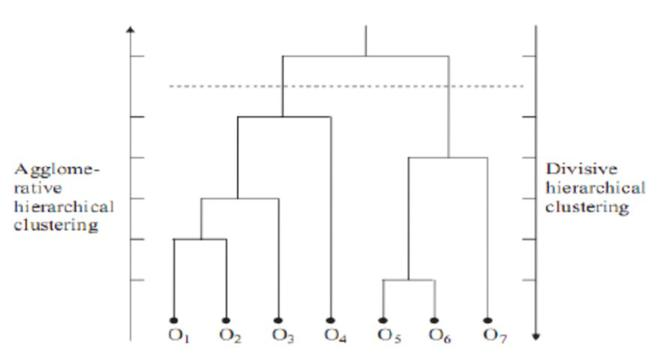

Agglomerative Clustering zorgt ervoor dat je datapunten in groepen worden verdeeld met behulp van labels.

Hoe werkt je algoritme?

Agglomerative Clustering begint eerst met kleine individuele datapunten, die krijgen dan een eigen cluster label, vervolgens worden deze samengevoegd met andere labels op basis van de vergelijkbaarheid tussen de twee datapunten. Dit proces is iteratief en het blijft doorgaan totdat de aangegeven aantal cluster (gegeven als parameter) bereikt is, of als alle clusters als 1 cluster gevormd wordt.

Wat zijn de voor- en nadelen?

## Voordelen:
* Kan goed omgaan met outliers
* Het is niet verplicht om vooraf aan te geven hoeveel clusters eruit moet komen
* Kan werken met verschillende datatypes en eventueel deze datatypes met elkaar vergelijken
* Clustervorming wordt getoond met een dendrogram en is overzichtelijk

## Nadelen:
* Het is een complex model en kan lang duren
* Werkt niet goed met zeer grote datasets
* Fouten worden niet verbeterd tijdens clustering(bijvoorbeeld als 2 datapunten met elkaar zijn gemengd terwijl het niet de bedoeling was)

Wat voor opties heb je voor performance evaluatie?

Zie: https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation

* Silhouette Coefficient
* Davies-Bouldin index
* Calinski-Harabasz index
* Adjusted Rand index
* Normalized Mutual Information
* Fowlkes-Mallow scores
* Homogeneity, completeness and V-measure

Welke parameters kun je instellen en wat betekenen deze?

* n_clusters: Aantal clusters die uiteindelijk tot stand komen
* linkage: Techniek dat bepaalt hoe de afstand tussen de clusters berekend wordt tijdens clustervorming
* affinity: Rubriek voor voor de parameter 'linkage' voor het bepalen van de vergelijkbaarheid tussen de datapunten
* distance_threshold: Een soort afkappunt dat gebruikt wordt tijdens clustervorming
* compute_full_tree: Geeft aan of er een volledige boom wordt gecreeerd (alleen belangrijk voor een paar bepaalde dendrogrammen)
* memory: Caching, zorgt voor een soepeler proces
* connectivity: Geeft structuur aan bij de clusterboom (kan handig zijn voor afbeeldingen)
* compute_distances: Geeft aan of de afstanden tussen de clusters worden meegenomen tijdens clustervorming

# Deelopdracht 1/2 - Iris Dataset

Begin met de makkelijkere dataset iris. Laad de dataset Iris in met de volgende commando’s:

In [1]:
from sklearn import datasets
iris = datasets.load_iris()

### Dataverkenning

Dit is wat er nodig is voor de hoogste score volgens de beoordelingsrubriek:

"Er is een grondige verkenning gedaan incl visualisaties van de data en er zijn onderbouwde keuzes gemaakt om data kwaliteitsissues te ondervangen. De groep maakt duidelijk onderscheid in belangrijke en onbelangrijke variabelen"

Selecteer alleen de petal length en petal width en de Species. 

Geef de petal length vs de petal width weer in een scatterplot en geef per species een andere kleur. 

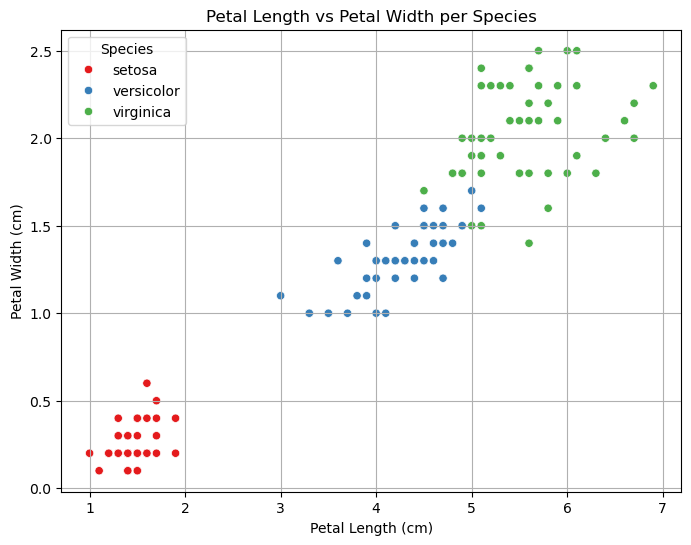

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

iris = datasets.load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

df_selected = df[['petal length (cm)', 'petal width (cm)', 'species']]

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_selected,
    x='petal length (cm)',
    y='petal width (cm)',
    hue='species',
    palette='Set1'
)
plt.title('Petal Length vs Petal Width per Species')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(title='Species')
plt.grid(True)
plt.show()


Zie je al duidelijke clusters?

Ja, er zijn duidelijke clusters zichtbaar in de scatterplot van petal length vs petal width per soort.

Hier is wat je waarschijnlijk zult zien (of al ziet) in de plot:

Observaties per soort:
Setosa
Vormt een helemaal afzonderlijke cluster.
Lage petal length en petal width (kort en smal).
Geen overlap met de andere twee soorten.

Versicolor
Zit in het middengebied van de plot.
Matige petal length en width.
Vormt een redelijk compacte groep, maar kan enige overlap hebben met virginica.

Virginica
Heeft de langste en breedste petals.
Vormt een cluster rechtsboven in de plot.
Er is soms wat overlap met versicolor, maar over het algemeen goed te onderscheiden.

Conclusie:
Setosa is duidelijk en makkelijk te onderscheiden – je zou deze met een eenvoudige regel kunnen classificeren.
Versicolor en Virginica zijn ook redelijk te onderscheiden, maar hun clusters overlappen lichtjes. Dit is typisch en maakt deze twee moeilijker te scheiden met simpele methodes zoals lineaire splitsing.

Voer een uitgebreidere dataverkenning uit (volgens de beschrijving hierboven uit de beoordelingsrubriek). Gebruik zoveel cellen als nodig, maar liever alleen plotjes/prints maken die echt een impact op jullie modellen gaan maken (samen met uitleg tekst van wat jullie daarmee opvalt). 

In [3]:
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
print(df.isnull().sum())  # Controle op ontbrekende waarden
print(df.describe())      # Statistieken per kolom


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


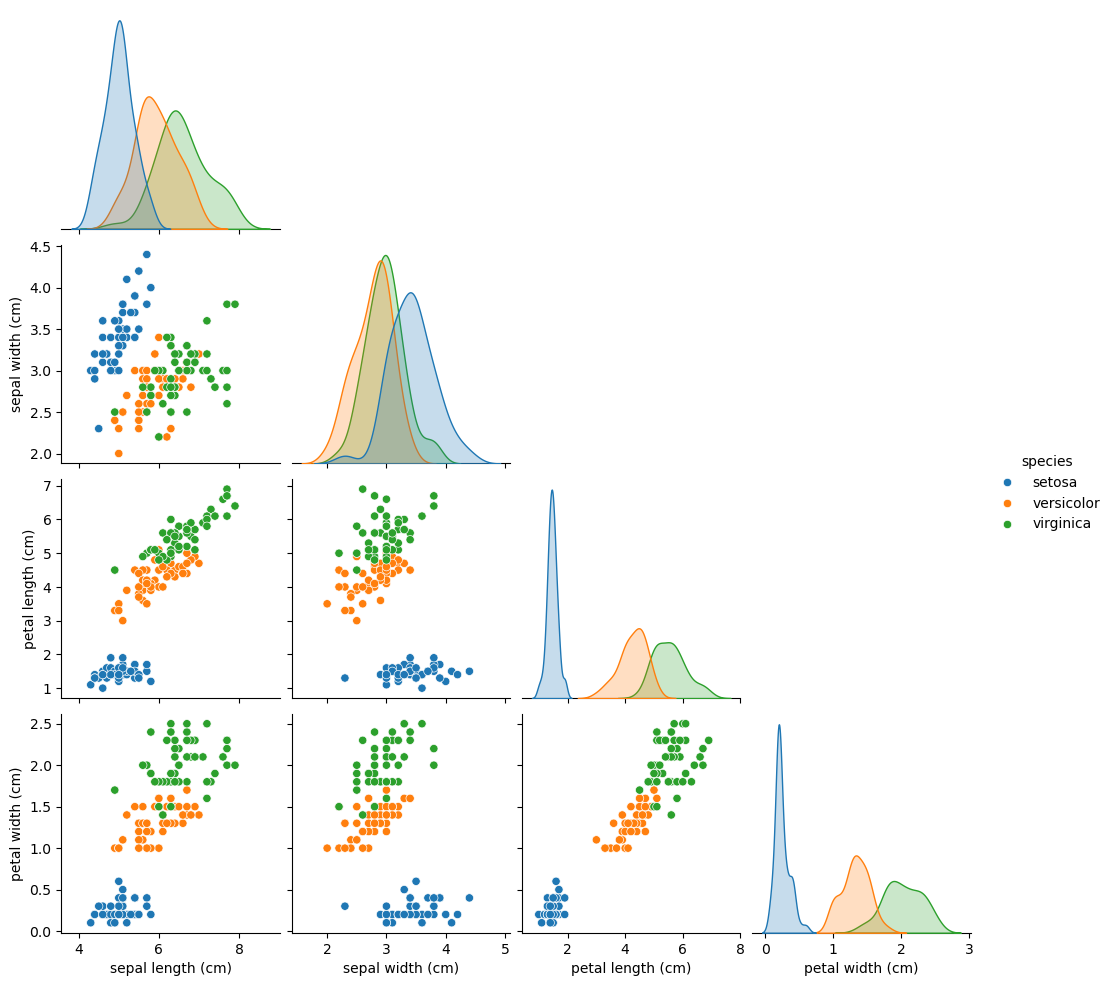

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue="species", corner=True)
plt.show()


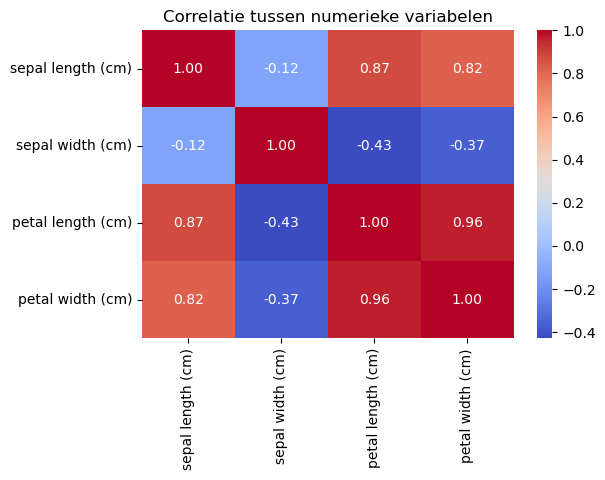

In [6]:
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlatie tussen numerieke variabelen")
plt.show()


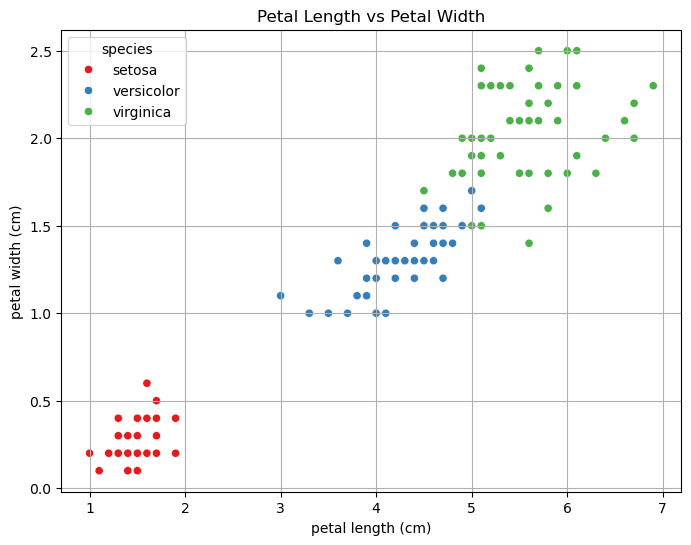

In [7]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='petal length (cm)',
    y='petal width (cm)',
    hue='species',
    palette='Set1'
)
plt.title("Petal Length vs Petal Width")
plt.grid(True)
plt.show()


(voorbeeld Markdown cell)

### Algoritme Toepassen

Pas nu het cluster algoritme toe op de variabelen petal length, petal width

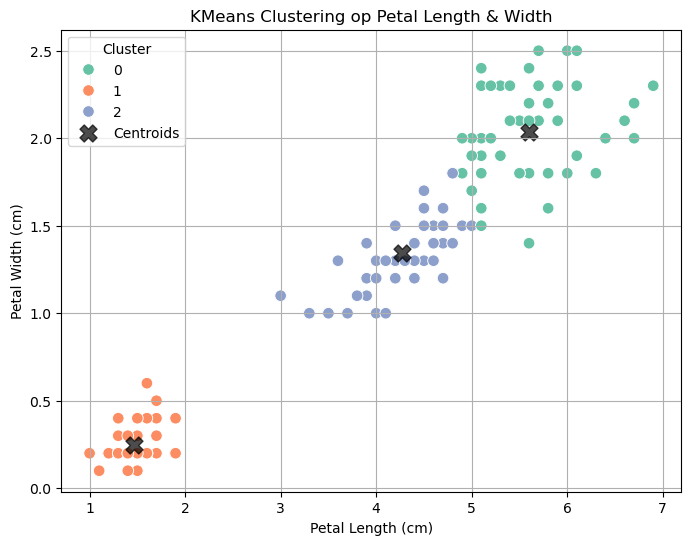

Cluster,0,1,2
Actual,,,
setosa,0,50,0
versicolor,2,0,48
virginica,46,0,4


In [8]:
from sklearn import datasets
import pandas as pd

# Laad iris data
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Selecteer alleen petal length en petal width
X = df[['petal length (cm)', 'petal width (cm)']]

from sklearn.cluster import KMeans

# Initialiseer met 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X['petal length (cm)'],
    y=X['petal width (cm)'],
    hue=df['cluster'],
    palette='Set2',
    s=70
)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=150, alpha=0.7, marker='X', label='Centroids')
plt.title('KMeans Clustering op Petal Length & Width')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

pd.crosstab(df['species'], df['cluster'], rownames=['Actual'], colnames=['Cluster'])


Visualiseer de clusters (zowel de voorspelde/werkelijke) met een kleur en voor de werkelijke clusters gebruik een ander symbool.

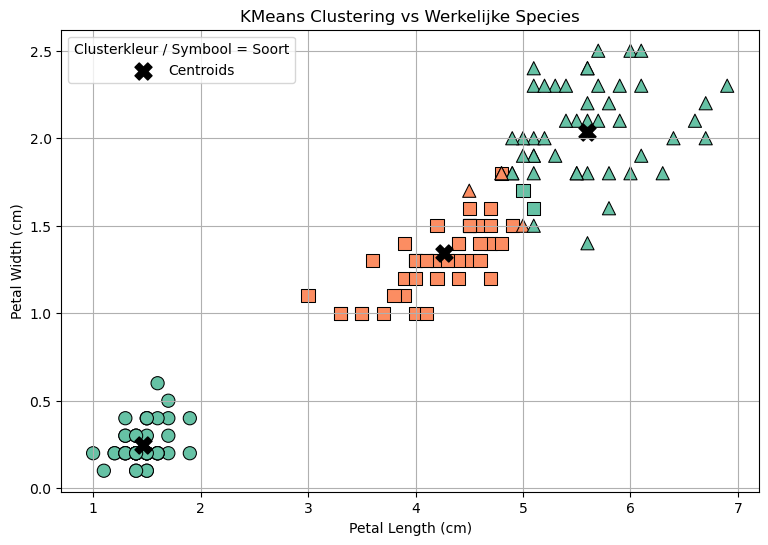

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import pandas as pd
from sklearn.cluster import KMeans

# 1. Laad de data
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# 2. Alleen petal length & width
X = df[['petal length (cm)', 'petal width (cm)']]

# 3. KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

# 4. Plot
plt.figure(figsize=(9, 6))
markers = {'setosa': 'o', 'versicolor': 's', 'virginica': '^'}

# Loop door elke species en plot deze met bijhorende marker
for species, marker in markers.items():
    subset = df[df['species'] == species]
    sns.scatterplot(
        x=subset['petal length (cm)'],
        y=subset['petal width (cm)'],
        hue=subset['cluster'],
        palette='Set2',
        style=subset['species'],
        markers=markers,
        marker=marker,
        edgecolor='black',
        s=90,
        legend=False
    )

# Plot clustercenters
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=150, marker='X', label='Centroids')

# Legenda & titels
plt.title("KMeans Clustering vs Werkelijke Species")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.grid(True)
plt.legend(title='Clusterkleur / Symbool = Soort', loc='upper left')
plt.show()


Vergelijk de voorspellende clusters met de werkelijke clusters (Species) in een confusion matrix.

In [11]:
from sklearn.metrics import confusion_matrix
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans

# Laad data
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
X = df[['petal length (cm)', 'petal width (cm)']]

# Voer clustering uit
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

# Converteer species naar numerieke labels
true_labels = df['species'].cat.codes  # 0 = setosa, 1 = versicolor, 2 = virginica

# Maak confusion matrix
cm = confusion_matrix(true_labels, df['cluster'])

# Zet om in DataFrame voor leesbaarheid
cm_df = pd.DataFrame(cm, 
                     index=['setosa', 'versicolor', 'virginica'],
                     columns=['Cluster 0', 'Cluster 1', 'Cluster 2'])

print("Confusion Matrix tussen echte soorten en KMeans clusters:")
print(cm_df)



Confusion Matrix tussen echte soorten en KMeans clusters:
            Cluster 0  Cluster 1  Cluster 2
setosa              0         50          0
versicolor          2          0         48
virginica          46          0          4


Wat valt op:
Setosa
Vormt een strak afgezonderde cluster.
Zowel visueel als in clustering perfect te onderscheiden.
KMeans plaatst deze 100% correct.

Versicolor & Virginica
Liggen dichter bij elkaar in de feature space.
De clusters van deze twee soorten overlappen lichtjes.
Hierdoor kunnen sommige versicolor-voorbeelden in virginica-clusters belanden en omgekeerd.

Verder valt op dat Setosa volledig correct geclusterd (50 van 50 observaties in één cluster) 
Versicolor en Virginica hebben een klein beetje verwarring:
2 versicolor-samples in cluster van virginica.
4 virginica-samples in cluster van versicolor.

Conclusie
KMeans werkt zeer goed op deze feature subset (petal length & width).
Eén soort (Setosa) is perfect te scheiden met KMeans.
De andere twee soorten zijn grotendeels goed geclusterd, maar hebben lichte overlap – dit weerspiegelt de natuurlijke complexiteit van het onderscheid tussen versicolor en virginica.
Een supervised model zou deze overlap nog beter kunnen leren.

Wat is de invloed van de instelbare parameters op de clusters?

1. n_clusters – Aantal clusters
Beschrijving: Aantal groepen dat je van tevoren aanneemt in je data.
Invloed:
Als je te weinig clusters kiest (bijv. n_clusters=2), worden verschillende soorten samengevoegd.
Als je er te veel kiest (bijv. n_clusters=4 of 5), splitst het algoritme bestaande soorten op, wat kan leiden tot onnodige complexiteit.
Voor Iris: De juiste waarde is n_clusters=3 omdat er 3 echte soorten zijn.
2. init – Initialisatie methode
Opties: 'k-means++' (default), 'random', of een custom methode.
Invloed:
Bepaling van de startpositie van de clustercenters.
'k-means++' zorgt meestal voor snellere convergentie en stabielere resultaten.
'random' kan leiden tot slechtere lokale minima (slechte clusters).
Tip: Altijd 'k-means++' gebruiken tenzij je het verschil wilt onderzoeken.
3. random_state
Beschrijving: Zorgt ervoor dat de resultaten reproduceerbaar zijn.
Invloed: Heeft geen invloed op clustering zelf, maar op consistentie tussen runs.
Zonder random_state kunnen de resultaten bij elke run verschillen door random initialisatie.
4. max_iter – Maximaal aantal iteraties
Beschrijving: Maximaal aantal keren dat de algoritme door de data loopt om de centers te herberekenen.
Invloed:
Als dit te laag staat, kan het algoritme niet convergeren → slechte clusters.
Voor kleine datasets (zoals Iris) is standaardwaarde 300 prima.
5. n_init – Aantal initialisaties
Beschrijving: Aantal keer dat KMeans opnieuw gerund wordt met verschillende starts.
Invloed:
Hogere n_init verhoogt de kans op het vinden van het globale optimum (beste clustering).
Bijv. n_init=10 (default) probeert het 10 keer en kiest de beste oplossing.

Creëer een model waarin te veel en te weinig clusters zichtbaar zijn (of leg uit waarom dit niet kan).

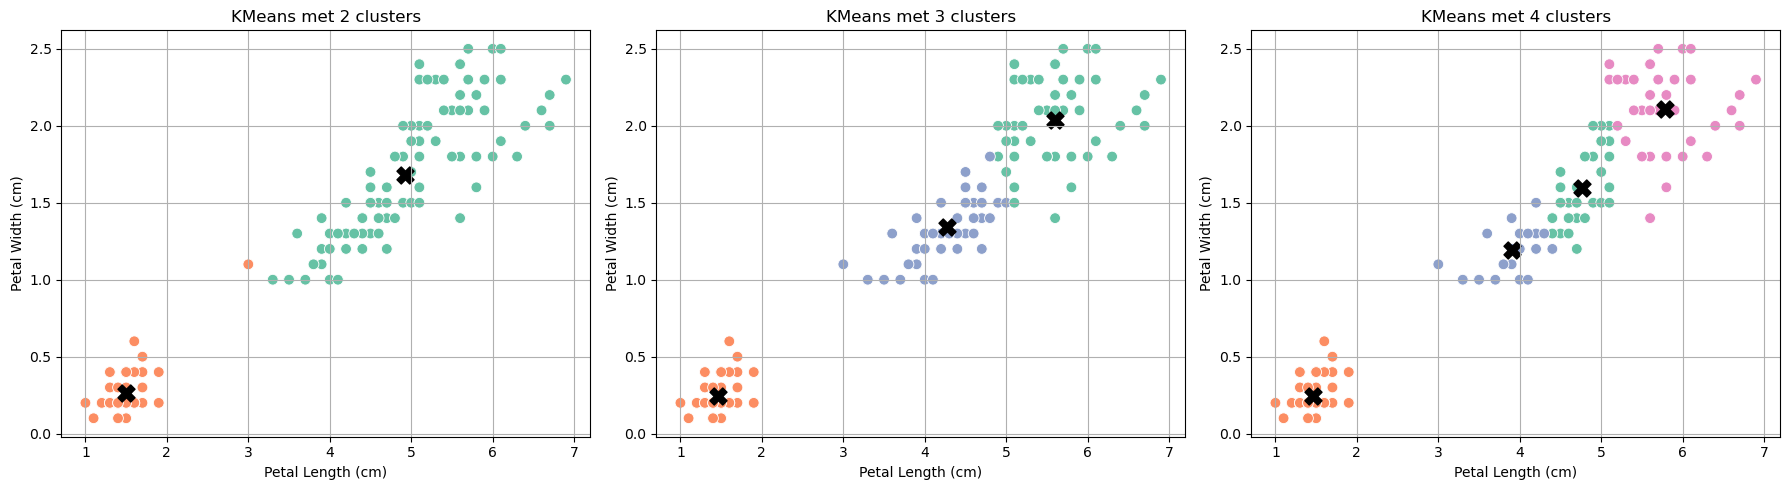

In [12]:
from sklearn import datasets
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Laad data
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
X = df[['petal length (cm)', 'petal width (cm)']]

# KMeans met 2, 3, 4 clusters
models = {
    2: KMeans(n_clusters=2, random_state=42),
    3: KMeans(n_clusters=3, random_state=42),
    4: KMeans(n_clusters=4, random_state=42),
}

plt.figure(figsize=(18, 5))

for i, k in enumerate(models, start=1):
    model = models[k]
    df[f'cluster_{k}'] = model.fit_predict(X)
    centers = model.cluster_centers_

    plt.subplot(1, 3, i)
    sns.scatterplot(
        x=X['petal length (cm)'],
        y=X['petal width (cm)'],
        hue=df[f'cluster_{k}'],
        palette='Set2',
        s=60,
        legend=False
    )
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=150, marker='X')
    plt.title(f'KMeans met {k} clusters')
    plt.xlabel('Petal Length (cm)')
    plt.ylabel('Petal Width (cm)')
    plt.grid(True)

plt.tight_layout()
plt.show()



Wat zie je?

n_clusters = 2 (te weinig):
Versicolor & Virginica worden samengevoegd.
Er is geen scheiding tussen die twee soorten.
De clustering is dus te grof.

n_clusters = 3 (juist):
Benadert de natuurlijke structuur van de data goed.
Setosa, Versicolor en Virginica worden grotendeels gescheiden.

n_clusters = 4 (te veel):
Eén van de echte soorten (bijv. Virginica) wordt kunstmatig gesplitst.
➤ Leidt tot onnodige complexiteit en slechtere interpretatie.

🧠 Conclusie
KMeans veronderstelt dat je het juiste aantal clusters weet.
Een verkeerde keuze van n_clusters leidt tot:
Onderclustering (samenvoegen van verschillende groepen)
Overclustering (opsplitsen van één groep in meerdere kunstmatige subgroepen)

# Deelopdracht 2/2 - Keuze uit 2 datasets

Laad nu een tweede dataset in, keuze uit:

1. https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python
2. https://www.kaggle.com/binovi/wholesale-customers-data-set 

### Dataverkenning

Dit is wat er nodig is voor de hoogste score volgens de beoordelingsrubriek:

"Er is een grondige verkenning gedaan incl visualisaties van de data en er zijn onderbouwde keuzes gemaakt om data kwaliteitsissues te ondervangen. De groep maakt duidelijk onderscheid in belangrijke en onbelangrijke variabelen"

Inspecteer en visualiseer de dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


data = pd.read_csv('Wholesale.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [55]:
data.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [56]:
data.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

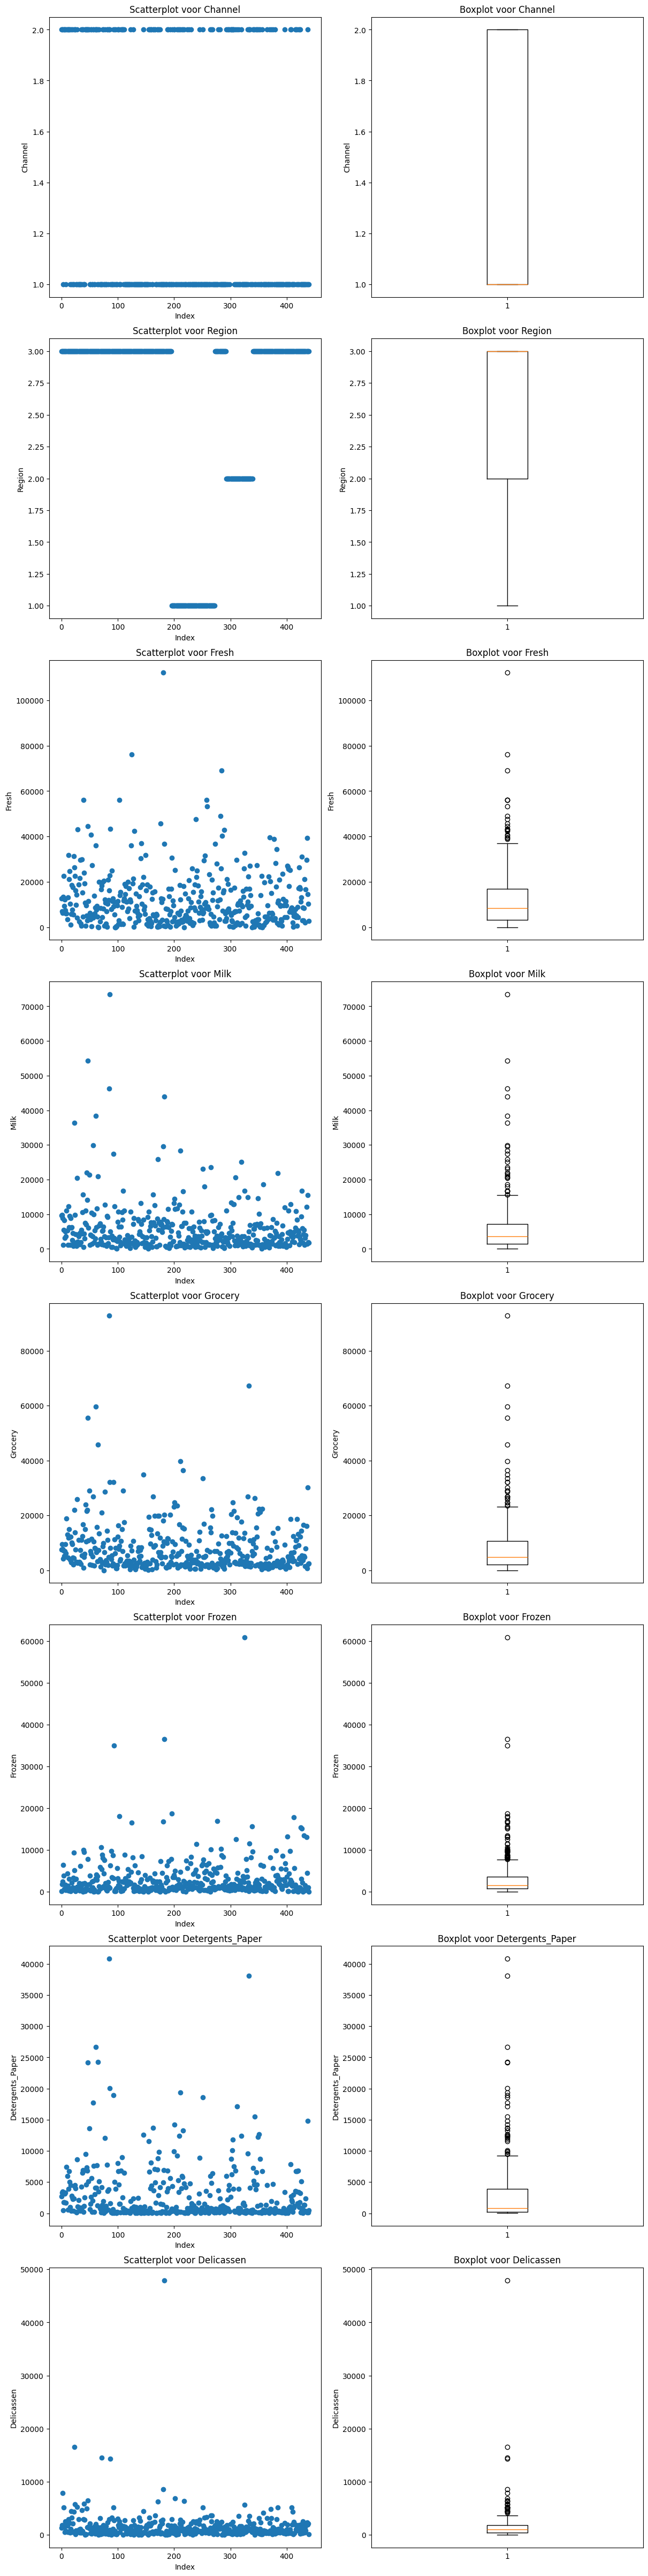

In [57]:
n_cols = len(data.columns)
fig, axes = plt.subplots(n_cols, 2, figsize=(12, 6 * n_cols), constrained_layout=True)
if n_cols == 1:
    axes = [axes]

for i, column in enumerate(data.columns):
    axes[i, 0].scatter(data.index, data[column])
    axes[i, 0].set_title(f"Scatterplot voor {column}")
    axes[i, 0].set_xlabel("Index")
    axes[i, 0].set_ylabel(column)

    axes[i, 1].boxplot(data[column])
    axes[i, 1].set_title(f"Boxplot voor {column}")
    axes[i, 1].set_ylabel(column)

plt.show()

Wat valt je op?

* Er zijn geen NA-waardes aanwezig in de dataset
* Alle datatypes zijn van type int64(numeriek)
* De eerste 2 kolommen (Channel & Region) sluiten niet echt aan bij de rest van de kolommen
* Er zijn redelijk veel extreme waardes aanwezig in elk kolom

Pas data cleaning toe (outliers en missende waarden). Let je proces uit in de commentaar.

In [2]:
# We gaan eerst beginnen met de 2 kolommen weghalen die niet relevant zijn
data = data.drop(['Channel', 'Region'], axis=1)

In [3]:
# Vervolgens gaan we met een loop door alle kolommen heen om alle outliers te filtreren
filtered_data = data.copy()
for column in data.columns:
    # We gebruiken hier de IQR methode
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    mask = (data[column] > lower) & (data[column] < upper)
    filtered_data[column] = data[column].where(mask)

In [ ]:
# We controleren daarna hoeveel waardes werden omgezet naar NaN door de mask (conditie van upper en lower bound)
filtered_data.isna().sum()

Fresh               20
Milk                28
Grocery             24
Frozen              43
Detergents_Paper    30
Delicassen          27
dtype: int64

In [4]:
# Als laatst verwijderen we deze waardes
filtered_data.dropna(inplace=True)
filtered_data.isna().sum()

Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

Voer een uitgebreidere dataverkenning uit (volgens de beschrijving hierboven uit de beoordelingsrubriek). Gebruik zoveel cellen als nodig, maar liever alleen plotjes/prints maken die echt een impact op jullie modellen gaan maken (samen met uitleg tekst van wat jullie daarmee opvalt). 

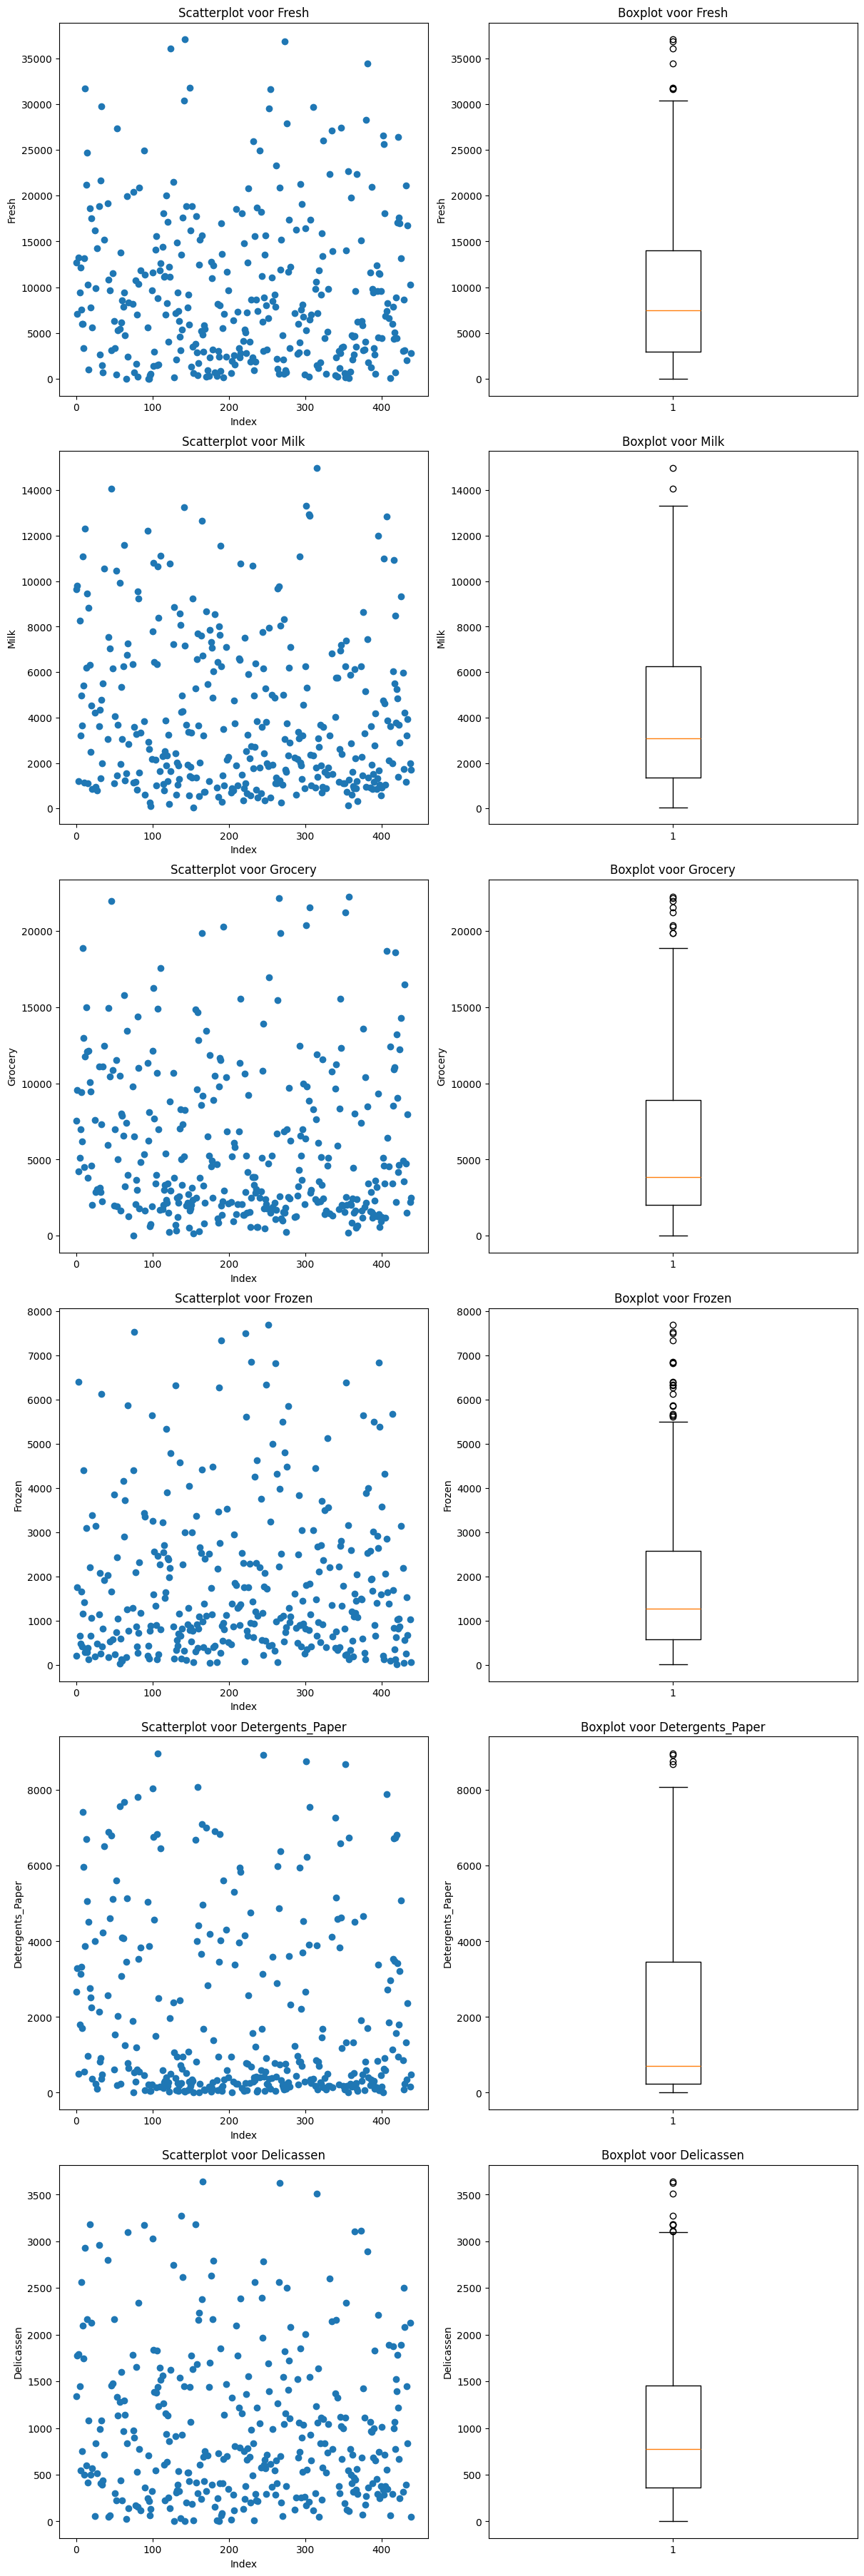

In [61]:
n_cols = len(filtered_data.columns)
fig, axes = plt.subplots(n_cols, 2, figsize=(12, 6 * n_cols), constrained_layout=True)
if n_cols == 1:
    axes = [axes]

for i, column in enumerate(filtered_data.columns):
    axes[i, 0].scatter(filtered_data.index, filtered_data[column])
    axes[i, 0].set_title(f"Scatterplot voor {column}")
    axes[i, 0].set_xlabel("Index")
    axes[i, 0].set_ylabel(column)

    axes[i, 1].boxplot(filtered_data[column])
    axes[i, 1].set_title(f"Boxplot voor {column}")
    axes[i, 1].set_ylabel(column)

plt.show()

De extreme waardes zijn weg en de plots zien er meer overzichtelijk uit.

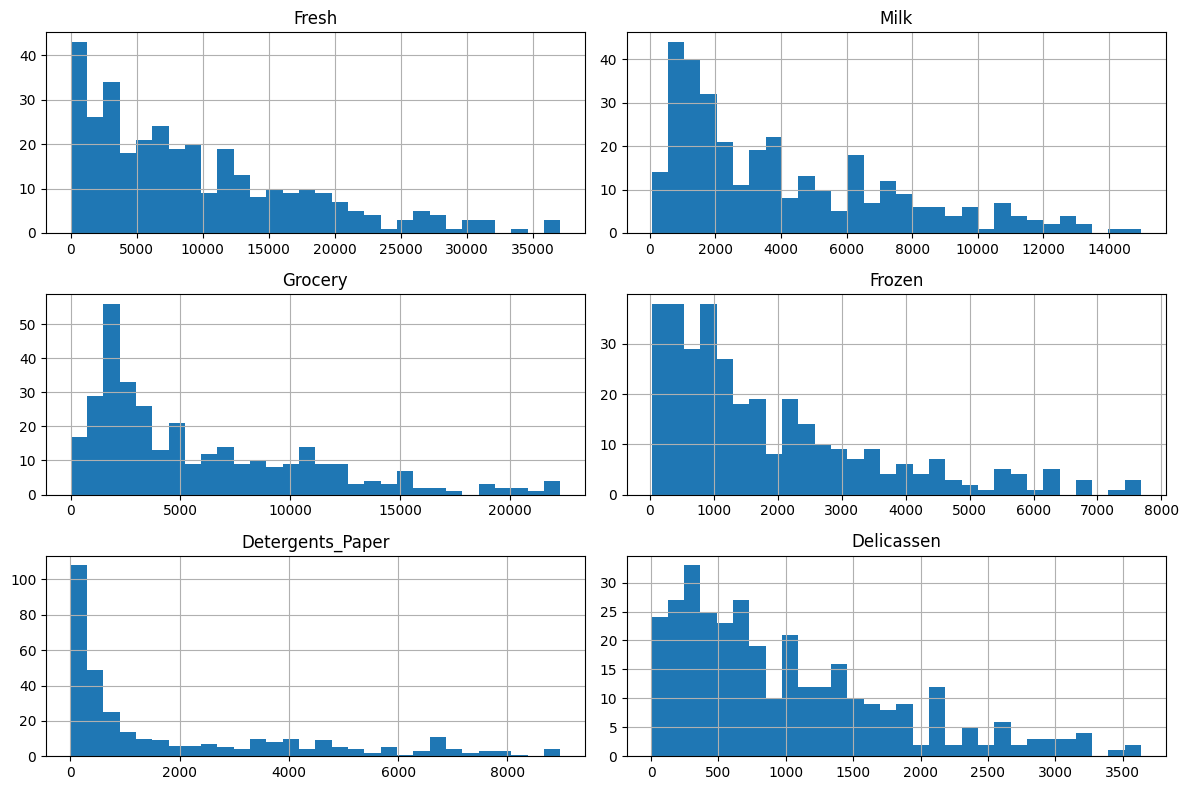

In [63]:
filtered_data.hist(figsize=(12, 8), bins=30)
plt.tight_layout()
plt.show()

De peaken voor alle kolommen zijn aan het begin van de histogrammen, dat wil zeggen dat meeste mensen relatief weinig geld uitgeven per categorie goederen.

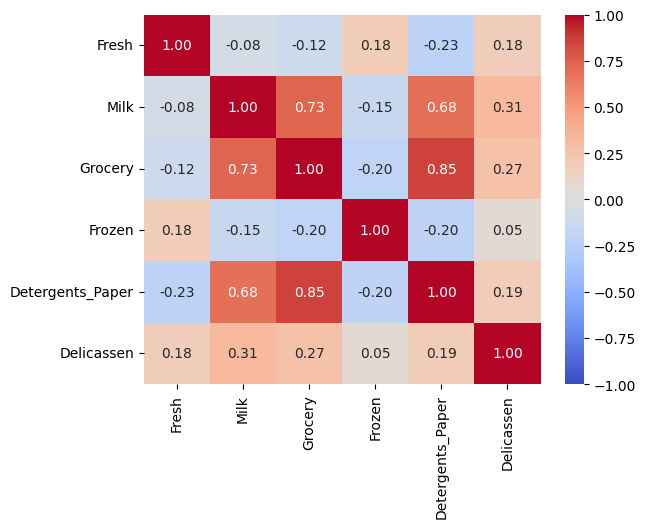

In [65]:
import seaborn as sns
sns.heatmap(filtered_data.corr(), annot=True, fmt=".2f", cmap='coolwarm', vmax=1, vmin=-1)
plt.show()


De kolommen 'Milk' 'Detergents_Paper' en 'Grocery' zijn positief sterk gecorreleerd met elkaar.

### Algoritme Toepassen

Dit is wat er nodig is voor de hoogste score volgens de beoordelingsrubriek:

(onder onderwerp Clustering): 
"Het gekozen cluster model is correct uitgevoerd in python en is werkend. Er is beschreven hoeveel clusters er gevonden zijn en er wordt benoemd wat hun eigenschappen zijn (interpretatie). De clusters zijn gevisualiseerd. Het model is getuned; er is nagedacht over de parameters en er is een elbow plot gemaakt."

(onder onderwerp Aantal Variabelen Clustering):
"De groep heeft aandacht besteed aan het bepalen van het aantal variabelen. De onderbouwing van het aantal variabelen is logisch. De groep laat zien wat verandering van het aantal variabelen doet met de uitkomst. Er is PCA uitgevoerd om het aantal variabelen te reduceren."

Pas het clustering algoritme toe op een selectie uit de beschikbare variabelen.

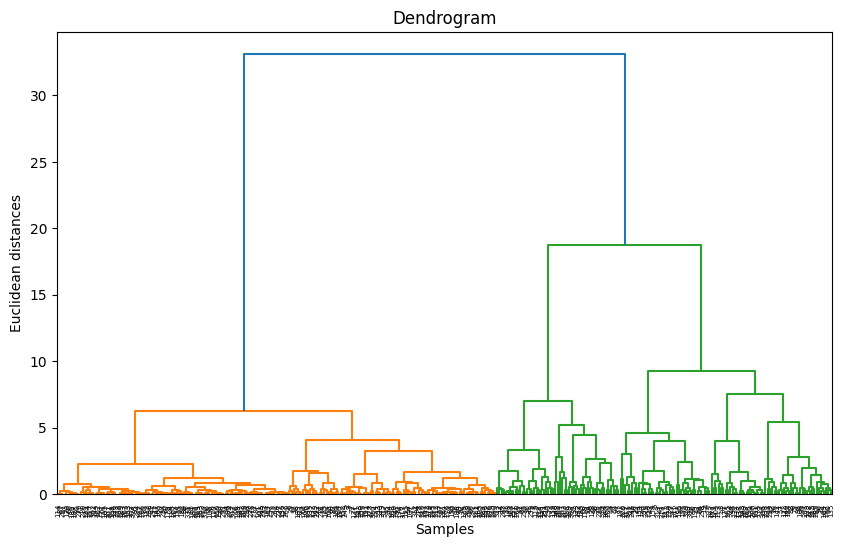

In [26]:
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

scaler = StandardScaler()
X_scaled = scaler.fit_transform(filtered_data[['Milk', 'Detergents_Paper', 'Grocery']])
X_normalized = normalize(X_scaled)
X_normalized = pd.DataFrame(X_normalized)

X_normalized.head()

cluster = AgglomerativeClustering(linkage='ward', metric='euclidean')
labels = cluster.fit_predict(X_scaled)
filtered_data['Cluster'] = labels

plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title("Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Euclidean distances")
plt.show()


In [ ]:
filtered_data['Cluster'].nunique() # Aantal clusters

2

In [ ]:
filtered_data['Cluster'].value_counts() # Aantal keer dat een cluster voorkomt

Cluster
1    188
0    144
Name: count, dtype: int64

Welke variabelen kies je en waarom?

'Milk', 'Detergents_Paper' en 'Grocery', want ze zijn relatief sterk gecorreleerd met elkaar.

Hoeveel clusters vind je? Kan je de clusters interpreteren (bijv een bepaald klantprofiel)?

Er zijn uiteindelijk 2 clusters bepaald door het algoritme, dit kun je interpreteren als:
* 0: Deze mensen geven een laag of gemiddeld bedrag uit aan producten van alle 3 categorieen (Zoals particulieren)
* 1: Deze mensen geven een hoog bedrag uit aan producten van alle 3 categorieen (Restaurants, bedrijven, etc)

Tune je model (vind en geef uitleg over de juiste waardes voor de instelbare parameters).

In [45]:
from sklearn.metrics import silhouette_score # We hebben ervoor gekozen om silhouette score te gaan gebruiken voor het evalueren van de beste parameters
ks = range(2, 11)
k_scores = [] # Deze gaan we straks gebruiken in een elleboog plot
for k in ks:
    model = AgglomerativeClustering(n_clusters=k, linkage='ward', metric='euclidean')
    labels = model.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    k_scores.append(score)
    print(f"Clusters: {k}, Silhouette score: {score:.2f}")

Clusters: 2, Silhouette score: 0.51
Clusters: 3, Silhouette score: 0.48
Clusters: 4, Silhouette score: 0.47
Clusters: 5, Silhouette score: 0.43
Clusters: 6, Silhouette score: 0.42
Clusters: 7, Silhouette score: 0.28
Clusters: 8, Silhouette score: 0.28
Clusters: 9, Silhouette score: 0.29
Clusters: 10, Silhouette score: 0.30


In [41]:
linkages = ['ward', 'complete', 'average', 'single']
for i in range(0, len(linkages)):
    link = linkages[i]
    model = AgglomerativeClustering(n_clusters=2, linkage=link, metric='euclidean')
    labels = model.fit_predict(X_scaled)
    print(f"Linkage: {link}, Silhouette score: {silhouette_score(X_scaled, labels):.2f}")

Linkage: ward, Silhouette score: 0.51
Linkage: complete, Silhouette score: 0.57
Linkage: average, Silhouette score: 0.57
Linkage: single, Silhouette score: 0.45


In [44]:
metrics = ['euclidean', 'l1', 'l2', 'manhattan', 'cosine']
for i in range(0, len(metrics)):
    metric = metrics[i]
    model_complete = AgglomerativeClustering(n_clusters=2, linkage='complete', metric=metric)
    model_average = AgglomerativeClustering(n_clusters=2, linkage='average', metric=metric)
    labels_complete = model_complete.fit_predict(X_scaled)
    labels_avg = model_average.fit_predict(X_scaled)
    print(f"Metric: {metric}, Silhouette score for complete: {silhouette_score(X_scaled, labels_complete):.2f}, Silhouette score for average: {silhouette_score(X_scaled, labels_avg):.2f}")

Metric: euclidean, Silhouette score for complete: 0.57, Silhouette score for average: 0.57
Metric: l1, Silhouette score for complete: 0.58, Silhouette score for average: 0.58
Metric: l2, Silhouette score for complete: 0.57, Silhouette score for average: 0.57
Metric: manhattan, Silhouette score for complete: 0.58, Silhouette score for average: 0.58
Metric: cosine, Silhouette score for complete: 0.56, Silhouette score for average: 0.55


Beste combinatie van hyperparameters: 
* n_clusters: 2
* linkage: complete of average
* metric: l1 of manhattan

Maak een elleboog plot voor een van je hyperparameters en leg uit hoe je het plot kan gebruiken.

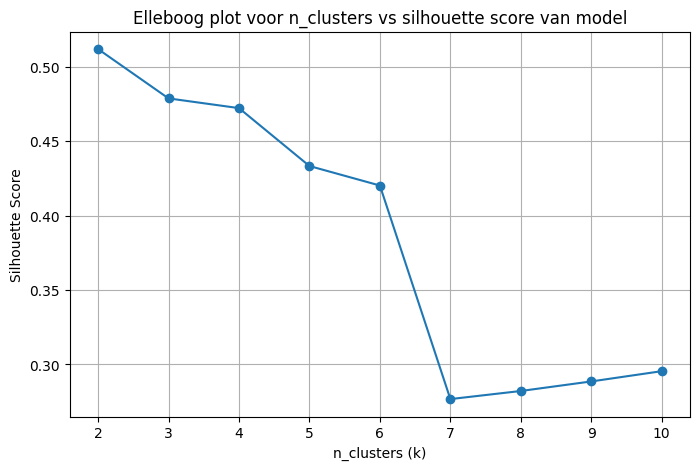

In [47]:
plt.figure(figsize=(8, 5))
plt.plot(ks, k_scores, marker='o')
plt.title("Elleboog plot voor n_clusters vs silhouette score van model")
plt.xlabel("n_clusters (k)")
plt.ylabel("Silhouette Score")
plt.xticks(ks)
plt.grid(True)
plt.show()

Met behulp van deze plot kun je de silhouette score van ons model waarnemen voor elk waarde van n_cluster (van 2 t/m 10). De beste waarde voor n_clusters is in ons geval 2 met de hoogste silhouette score van 0.51.

Pas PCA (Principal Component Analyse) toe om het aantal variabelen kleiner te maken. Leg je resultaten uit. 

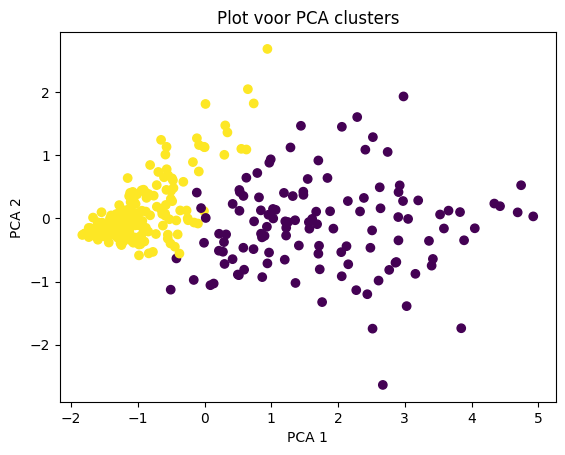

In [53]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_avg, cmap='viridis')
plt.title('Plot voor PCA clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In de plot hier kun je zien dat de datapunten gescheiden zijn met 2 kleuren, gele punten zijn cluster 0 en paarse punten zijn dan cluster 1. Je kunt ook zien dat als x groter wordt, dan zijn er veel meer paarse punten, dat zijn dus de groep mensen die veel geld uitgeven aan producten van alle 3 categorieen.